In \[2\]:

    import numpy as np # linear algebra
    import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


    import os
    import bz2
    import re
    from tqdm import tqdm
    from sklearn.utils import shuffle
    from matplotlib import pyplot as plt
    from keras.preprocessing.text import Tokenizer
    from keras.preprocessing.sequence import pad_sequences
    from keras.models import Sequential
    from keras.layers import Embedding,LSTM,Dropout,Dense
    from keras.callbacks import EarlyStopping, ModelCheckpoint
    from nltk.corpus import stopwords
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelBinarizer

In \[47\]:

    def reviewToY(review):
        return [1,0] if review.split(' ')[0] == '__label__1' else [0,1] 
    def reviewToX(review):
        review = review.split(' ', 1)[1][:-1].lower()
        review = re.sub('\d','0',review)
        if 'www.' in review or 'http:' in review or 'https:' in review or '.com' in review:
            review = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", "<url>", review)
        return review
    def splitReviewsLabels(lines):
        reviews = []
        labels = []
        for review in tqdm(lines):
            rev = reviewToX(review)
            label = reviewToY(review)
            reviews.append(rev[:512])
            labels.append(label)
        return reviews, labels

In \[48\]:

    train_file = bz2.BZ2File('test.ft.txt.bz2')
    train_lines = train_file.readlines()
    train_lines = [x.decode('utf-8') for x in train_lines]
    # Load from the file
    reviews_train, y_train = splitReviewsLabels(train_lines)
    reviews_train, y_train = shuffle(reviews_train, y_train)
    y_train = np.array(y_train)
    print(y_train[1])

    100%|██████████| 400000/400000 [00:25<00:00, 15684.49it/s]

    [0 1]

In \[ \]:

     

In \[51\]:

    for i in range(100):
      print('Sentence ',reviews_train[i])
      print('Label ',y_train[i])
      print()

    Sentence  scam: i attempted to order this item, but when i got the confirmation email from the shipper, it was for the extension, not the stand-alone mat. when i called to correct the problem, instead of sending me the stand-alone mat at the posted price, they told me they could send me the stand-alone for $00.00, or the extension for $00.00.scat mats are a great product, but beware that what you're ordering here may not be what you think.
    Label  [1 0]

    Sentence  lack of communication: obviously, if people communicated in this book there wouldn't be a story. but it was so sad! the story revolves around ruth, who is raised by her aunt amanda after ruth's mother, mattie, drowns and while ruth's father, carl, is off during wwi. while there is dishonesty and deception throughout the book, "drowning ruth" differs from many modern books in that there is little to no malice involved. the story, with chapter notes by ruth and amanda, is incredibly well-told; i would have gi
    Label  [0 1]

    Sentence  lite brite flatscreen: i bought this lite brite flatscree online for somewhere around 00.00 and then i was looking at the k mart ad and they had it for 0.00 and also walmart had it for 0.00, so i felt like the price was a rip off. usually amazons prices are competive so i didn't compare prices before i bought it, so partly it was my fault. but to charge that much more for something is not right.
    Label  [0 1]

    Sentence  age of empires iii: i can not get it to work on my windows xp or windows 0 machines. it arrived quickly and in good shape.
    Label  [1 0]

    Sentence  good, though flawed: i enjoyed this book because it was engrossing and well written. i thought cornelia was a little too quirky - annoying sometimes - and things wrapped up too neatly in the end. i didn't think a lot of it was very realistic. all in all, i liked it, though, mostly because of de los santos' word choice and description.
    Label  [0 1]

    Sentence  what? how did this happen?: ive never been quite as hopelessly addicted to a videogame like i have to animal crossing. i will find myself keeping track of the time in my real life so as not to miss a special event, sale or visitor in the game. i find myself hunched over my computer, trying to find just the right universal code before tom nook's shop closes. i've obsessively combed ever acre of my little cyber villiage looking for bugs, fossils, money and buried treasure. and i love every sugary minute of it
    Label  [0 1]

    Sentence  boring: i bought shout first and then went and got this and boy was it a letdown. very boring christian pop. maybe 0 bright spots but this cd never finds it's way into my player as there is so much better christian music out there nowadays. if you are looking for 00 dba when they were in their techno/ dance vein pick up shout or bubble!!!
    Label  [1 0]

    Sentence  did not work.: i tried this and it would not keep my carseat off the ground. the carseat was too heavy or i could not get it cinched tight enough. after fiddling with it for 00 mins with my toddler standing and waiting for me, i just dragged my carseat through the airport strapped to the suitcase with everyone staring at me. no way would i put my kid in it. waste of money.
    Label  [1 0]

    Sentence  hats off to 00 cent: i think this book is exceptional. i do not think he is greedy. his doing it big and i'm givin him all the props he deserves. he is a talented man and his doing his thing. i recommend this book to everyone. it helped me really understand were he comes from and makes my luv for him and respect for him higher... i luv fifty!!!!!!!! congragulations to him.
    Label  [0 1]

    Sentence  these are grown in california.: i bought them at a local foodie-palace, but i don't think the proprietess had really looked at the label. it's a clever way to repackage standard variety tomatoes with an expensive-sounding name. san marzanos form italy can be wonderful, and expensive. canned tomatoes from california might be, but these are not. stay away.
    Label  [1 0]

    Sentence  a sad re-hash: while i'm a big marvin gaye fan this collection does nothing for me whatsoever.been there&done that a ton of times already.marvin gaye is bound to have more material that hasn't surfaced yet that would better be welcomed instead of 00 ways to promote the same thing over&over again.
    Label  [1 0]

    Sentence  indypublish doesn't include pictures: annie besant generates useful and thought-provoking theosophical books. thought-forms is no exception. [...] they excluded the 00 pictures that gave focus and supporting data for the information. so make sure that if you buy a copy of the book it is not from these guys, because you will be disappointed as i was.
    Label  [1 0]

    Sentence  shoddy scholarship: bellesiles's new book arming america is best understood as an example of monumentally shoddy scholarship. filled with errors, misquotations, and outright falsehoods, it is a wonder the book got published at all. it is clear that bellesiles's political ideology was more important than empirical fact. clayton cramer, a historian and author of "concealed weapon laws of the early republic," has conducted a nearly paragraph by paragraph refutation of the book. i suggest readers interested in 
    Label  [1 0]

    Sentence  love these guys!!: i rate this cd slightly above their debut -- only because this has more songs on it. br0-00 is the most exciting band of any kind around today. (and the mavericks have a solid lock on 0nd place.)i can barely listen to "seven nights to rock" in my office -- my arms and legs start swaying, and i want to be jumping around!
    Label  [0 1]

    Sentence  great cinematography does not make a great film...: you would have thought people would have realized this by now after seeing malick's 0000 confusing editing fiasco "the thin red line".my review on this film is almost a carbon copy on what i wrote about "the thin red line", although i have to admit that this one made leagues more sense but was twice as boring. again, editing problems were still a major issue as well as a meandering storyline.the ony saving grace for either of these films was the cinematogr
    Label  [1 0]

    Sentence  reboot: as experienced realtors, my husband and i got sort of a reboot from this book. we had been through good times when you forget about the 'beginnings' of hustle and get all satisfied with your current market, clients and customers. harder economic times make you go back to the basics, so this was a great reminder and inspiration.
    Label  [0 1]

    Sentence  no worth your money or time - but read the first one!: i was extremely disappointed with the second baby wise book. i loved the first one and pretty much followed it for my now 0 month old daughter and she did sleep through the night just at 0 weeks! which was amazing. coming off that high, i was eager to read the second book to see what insights the authors had to offer. my opinion is that the first book was so good and popular, they wrote a second book without much original thought. the authors re-hash th
    Label  [1 0]

    Sentence  freddie c.: it is the best sponge i've ever used. it blends perfectly.this is truly a blending sponge, it promotes an almost flawless coverage.
    Label  [0 1]

    Sentence  newer sound, much better than the beekeeper: i have loved tori for awhile now. i'm an under the pink lover, so this album has a different sound than some of her older albums, but keeping up with modern music. still very good though, produced very well, and makes me forgive her mistake with "the beekeeper".
    Label  [0 1]

    Sentence  extremely noisy: the noise level is so annoying i can't keep it on long enough to determine how much air it circulates.
    Label  [1 0]

    Sentence  good old gripe water to calm baby's crying due to gas: i was surprised to find that they had gripe water on amazon and none other than 'made in india' woodward's! it is a great option to soothe my baby's crying especially when he seems to cry for no reason - he has been fed, he's changed and sleepy but cranky - its usually gas that gives him trouble. often i have given him a drop or two even as was crying and he would stop in the middle of a yell :-) i would certainly recommend it along with choosing a form
    Label  [0 1]

    Sentence  good starter book: emphasizes the natural ways to accept and learn atheism. strong on acceptance and non-violent means to avoid arguments with organized religion.
    Label  [0 1]

    Sentence  where is it?: this is my second attempt at ordering this item. and still not received. it might be good once i ever receive it.
    Label  [1 0]

    Sentence  damn this game is great!!!: this game is outstanding!!. it is one of my favorite rpg`s of all time. no other rpg comes close to this one. it has a great story line, memorable characters, and one of the best fight songs for any rpg game. this game deserves the rating i gave because it`s great for hardcore gamers, and it`s fun for people who never heard of final fantasy! you will make this your game for all time, watch and see!!
    Label  [0 1]

    Sentence  bogged down: i have read and enjoyed all the fienstein books but this time i got bogged down. he should have just concentrated on a couple of teams. i got confused reading about the entire league.
    Label  [1 0]

    Sentence  lets see the facts: turn on your tv to wpoptv aka poptv and see that ciara is a 0-hit-wonder for "goodies." once i knew that she and other untalented cheeseheads were on the 0-hit-wonder special, i became to like really the channel!ciara is just another 0-hit-wonder has been!she had 0 hit--"goodies" and when no one wanted her sorry untalented a(...), she became a kiddie star!
    Label  [1 0]

    Sentence  run, don't walk, away from this turkey!: james caan grimacing and flinching throughout this movie, while lisa bonet, still tattooed, does her best impersonation of halle berry.p..and may i add..u!do yourself a favor and buy the book, read it, and get the fantastic,( though low in production values), pbs production.you won't be disappointed.
    Label  [1 0]

    Sentence  also an excellent text/reference for graduate level radiobiology students (like ra's): while this reference has been used by radiologists and residents in radiology for a number of years, the emergence of post certification (at the baccalaureate and masters level)programs of study has created a new audience for this text. it does an excellent job presenting material beyond the rt / associate degree level courses.
    Label  [0 1]

    Sentence  wow!: such talent, such drive and focus. would that his later novels were as powerful as these stories. went to a garage sale and bought a bunch of used short story collections, including night shift, different seasons and skeleton crew. i had just finished harry shannon's killer 'night of the beast' when i dug into the older king stuff. nobody does (did) it better. if you haven't read 'survivor type' you're a horror neophyte. it will gross you out and make you laugh at the same time, the sign of a master a
    Label  [0 1]

    Sentence  tremendous little camera: i purchased the n 0 through amazon about a year ago , and i forgot to speak it's praises ! sleek and very reponsive ! i own a number of d / cameras , and this one is really a keeper ! r e keay
    Label  [0 1]

    Sentence  has to be seen to be beieved!: this has to be one of the sickest flicks on celluloid. i couldn't believe such a fim existed. it's no wonder that pasolini was murdered not long after the release of the movie.
    Label  [1 0]

    Sentence  the little house: the little house is about a little house that is built with care and is lived in until a city grows around it. the little house always wanted to live in the city until it actually happens. it teaches that you should be careful about what you wish for. i think the age level is around 0-0 years. the book was ok it was kind of boring
    Label  [1 0]

    Sentence  fine submarine film: if you love movies about submarines, this is well done. one of the classics, though at times the tension may seem a bit contrived.
    Label  [0 1]

    Sentence  possibly the most boring book i have ever read: possibly the most boring book i have ever read. once i laid it down it was difficult to pick up again. much too long. the author needed a good editor. james mckinney, hamden ct
    Label  [1 0]

    Sentence  this toy is great!!!!!!!!!!: this is great for studing. when i got it, it helped me with my grades. most parents should recommended this learning toy to their children.
    Label  [0 1]

    Sentence  nice product: nice product, clever concept, shipping was a little slow but looking at other reviews it appears they took some time off after the holidays, as many people who ordered at the same time i did received items later than thier normal ship time.
    Label  [0 1]

    Sentence  a vision of a time long past: wow. i was really looking forward to viewing the blu-ray - i had not seen the film for over 00 years.technically, the transfer is excellent. content-wise, it was like putting on a pair of paisley bell bottom pants. you look at it and think "what the hell is that?"the colors and graphics are vintage peter max style eye-exploding visuals. the story and dialogue are mostly mumbles and nonsense.you might want to consider renting this - anybody want to buy my used copy? just viewed 
    Label  [1 0]

    Sentence  the book was not very interresting or good: at the very begining of the book, rocket summer and ylla, i thought i would be very interested. they are in good detail. the story kept me wanting to read more. it wasn't until i read the summer night that i started to think the book was not for me. from that point on i have to say i was not wanting to read the book. every thing seemed so far fetched. especially the bee gun. i like science fiction books but books that are more realistic. that is just a few of my t
    Label  [1 0]

    Sentence  vmware: old fashioned, i bought this book because it was the more actual i found. topics are described but no explained in deep. just a short reference.
    Label  [1 0]

    Sentence  jeanette- how @ women are fowl?: i bought this since i know jeanette & loved the book and the concept. she researched a book about the fairer sex, but abandoned it. i want it.
    Label  [0 1]

    Sentence  this game blows: i was really excited to get the game...until a began playing it. the forced story line is not what i expected. i got through the game only because i wanted to see what was next in hopes that it got better (which it didn't). the side games are pretty lame. the only one i continued to play was kheel haulin cards. it was a decent game except when the computer takes your cards at random! that was really frustrating. the game has no instruction on how to really play it, and why it is ok for the 
    Label  [1 0]

    Sentence  sweet with a life lesson: cute little break from reality with a kind of tree of life message. nice change from some of the mindless garbage we are otherwise subjected to, like "this is 00" that i saw last night!
    Label  [0 1]

    Sentence  it's comedy evil!: i have and always will watch this movie again and again. i find it morbidily fascinating, yet happliy strange. a great movie!
    Label  [0 1]

    Sentence  still waiting~~~~~: i can't give an honest review yet, however, it has been a while since i placed my order, & i haven't received anything from anyone....... unless you count the bill, lol!the magazine service provider seems lack promptness... or, who knows, they may have went under in this economy!looking forward to getting the birdtalk magazine, when & if it should ever arrive!
    Label  [1 0]

    Sentence  new book just like ad described: this book was new just like the ad described and i received it very quickly. thanks a bunch.
    Label  [0 1]

    Sentence  ok but not too excited about it: these shoes are atleast half or a full size bigger than the size that is listed. this creates a big problem specially when you are buying something online and also when you cannot return easily to a store nearby. amazon charges return shipping charges if you say that you bought a bigger size when it is really their problem that the size is not in conformance with the universal size standard. shoes are ok but look a lot cherryish than it looks on the website.
    Label  [1 0]

    Sentence  this is not the blues king peter green!: if you love the blues, stay away from this! this has been mistakenly linked to the name of fleetwood mac founder peter green. this is some other guy with the same name, not the blues genius. this is some sort of experimental techno junk, and any blues fan who buys it will regret having spent the money for "music" not even yoko ono would claim. i made the mistake. don't let this happen to you.
    Label  [1 0]

    Sentence  hard to get through if you're an adult: some of this author's early books are entertaining even for adults in the same way harry potter is, but this book is very difficult to get through because of the nonsensical plot. you can feel the author trying very hard to make something out of an idea, and spinning out prose just for the sake of making a longer book, but it is a very very thin story. it was much better conceptualized as an animated film by miyazaki (studio ghibli), also of the same title, because th
    Label  [1 0]

    Sentence  uh tom is not boston: i am a huge fan of boston's first 0 albums. i saw this album at the record store and was very excited. i bought it out of loyalty without hearing a song on it. i really gave this album every chance. i really tried to like it. bottom line is this cd will be collecting alot of dust. the first song is good but sounds just like amanda. this song alone earns the 0 stars i gave this album. the rest of the album is a waste of space i'm sorry to say. i can't beleive it took what 0, 0 years to 
    Label  [1 0]

    Sentence  why is this rated so highly? are only teens reviewing it?: i admit that i'm only about 00 pages into the book so far, but it reminds me of a harlequin bodice ripper, at least it's written with simpering metaphors like one (i read those when i was 0, but then i grew up).i've found two glaring spelling and punctuation errors so far, terrible in so few pages. (rings a sparkling on his hands?) a sparkling?? geez.i'm tempted to just put it down and go on to another book, but the reviews have been so glowing that
    Label  [1 0]

    Sentence  below average: flavor is bland needed to nearly double the amount to get it where i liked. warning as well product has maltodextrin its the equivalent of sugar for diabetics. will not buy again may be fine for those who like there chai with a weaker flavor
    Label  [1 0]

    Sentence  what a load of rubbish: not only was it a asinine story about nothing, stylistically the writer can't write for beans. i cannot believe a book of such 0rd rate quality could capture the hearts of so many. actually, yes i can.
    Label  [1 0]

    Sentence  very useful and stable: just the right thing and very stable with the rubber studs. easily switchable with the color indicators for the active line.
    Label  [0 1]

    Sentence  music vs games, thx vs gmx: ok heres the deal, i own both the gmx and the thx speakers. if you want to buy these speakers for music purpuses and i mean loud music with alot of bass, dont get these speakers get the thx by klipsch they are the same price and are defiently better at piccking up lows and have a good abss response. i have tested both and the thx just outperforms the gmx with less distortions. now if you want a good 0.0 speaker set for connecting to s dvd player or video game console buy these sp
    Label  [0 1]

    Sentence  boring boring boring: to be honest this is the first black lesbian series i've ever seen. i thought the video footage was terrible it gave me a migraine, the majority of the actors were beginners which they could not act at all. the story lines were ok but i would not waste my money with this one. there is a season 0 maybe that one will be better than this one.
    Label  [1 0]

    Sentence  did not perform well: i bought this product to primarily clean the grout in the bathroom. i was also hoping that it would work well for the kitchen floor. i was so disappointed. i had read the previous reviews and thought this sounded like it performed fairly well. well it didn't. i sent it back. not only was it loud - i was almost deaf after using it in the bathroom with the noise echoing off of all that tile - but it just didn't do much at all. maybe it works good for other things?
    Label  [1 0]

    Sentence  do not buy this piece of junk!: hp might know how to make a computer but they cannot make a camera that is worth buying. camera has never taken great pictures and 0 months after the warranty ran out, the camera quit. it turns on for a second, shows an e000 error message, and shuts down. in doing some checking this means the lens is stuck. hp support was horrible and stated it could take up to $000 to fix it!!! what??? the camera is not worth it. it eats batteries and no matter how much you customize the opt
    Label  [1 0]

    Sentence  disappointed: the cards and the book are too small to be of any practical use. as a novelty, it is fine. however, i did not think that was what i was purchasing.
    Label  [1 0]

    Sentence  really, really bad!: as a writer, hoyle is justly forgotten now and the fifth planet is really incredibly bad, so bad it's almost funny!
    Label  [1 0]

    Sentence  the heart of the big 0: of bad religion's "big three" (suffer, no control, agaunst the grain), this one is the throbbing heart bursting with anarchy the intelligence to fight the law. composed of short, punchy songs, the longest is 0:00, if you blink, you'll surely miss one of these great punches into the gut of authority. without a doubt, one of the best albums ever written. standout tracks are big bang, no control, i want to conquer the world, sanity, you, billy. this is the standard of punk rock.
    Label  [0 1]

    Sentence  interesting but mildly partisan: the unfortunate slant to information presented leaves me wondering about the verisimilitude of all facts contained in this book. the author rightfully bashes clinton for his lapses in the undeclared war on terrorism. however, he doesn't discuss how clinton had less public support to undergo the full-blown war that bush enjoyed after the attacks. he also doesn't mention that bush sent millions in tax-payer dollars to bin laden only months prior to the attacks and that he did 
    Label  [1 0]

    Sentence  would be a good product if the alarm was loud.: the product was easy to set up and very easy to use. however, i was quite disappointed when i heard the alarm. it was about as loud as my alarm clock. i read another reviewer on amazon who complained that alarm was not loud and i though maybe he/she was exaggerating. once i heard the alarm go off during the test i knew the item would not work as a deterrent. certainly it is loud enough to wake the home owner at night; but, not loud enough to scare away the int
    Label  [1 0]

    Sentence  bad heater: please don't buy this heater. it shut off after 00 seconds and won't turn back on forever. do not recommended.
    Label  [1 0]

    Sentence  a bad beginning---headed for a bad series: this is a book i will happily put in the category of well-written garbage. not a book i'd recommend for the specified age group at all. the writing is excellent, sometimes moving. but...but this is a story of child abuse, plain and simple, and there's nothing funny about it. the children are victims, and nothing they do reduces their suffering. in the wolves of willoughby chase, by joan aiken, the children are victims, yes, but they are resourceful and strong, and 
    Label  [1 0]

    Sentence  not possible to use as a primary dictionary: i was always impressed by the build-in dictionaries in kindle. the function works wonderfully with english-french or english-german dictionaries. unfortunately, this czech dictionary is completely useless. i am disapointed that amazon does not specify which dictionary works as a build-in one and which not.
    Label  [1 0]

    Sentence  'throne of drones' - various artists (asphodel records) 0 0/0 stars: first time i heard about this release,a friend of mine more or less had to remind me that i was a fan of at least some drone,which is rhband and flying saucer attack.until then,i assumed those two artists were tagged as 'noisy space rock'.had no idea as to what 'drone' actually meant.well,i do now.i was quite impressed with 'throne of drones',where you get an introduction-like cut of such artists as robert rich,steve roach,jeff greinke,rhy
    Label  [0 1]

    Sentence  this is the best game: this is the absolute best game in the world (with the possibleexception of cops n robbers*) and you should buy it. if you want tohear why it is cool read on, but if you just think that what i said is enough to get you to waste $00 bucks then go buy it hopefully knowing that this game contains niccotine. the reasons this game is cool:0. it has absolutely (great) graphics 0. it has great puzzles that will waste your time in a good way.there are lots more reasons but i'm too lazy to list
    Label  [0 1]

    Sentence  good: i'm not the typical person who likes silly long out dramas about a bunch of people i could care less about(legends of the fall makes me physically sick). after watching a bunch a wb shows about earnest perfect looking teens (can anyone say dawson's creek)i was expecting the same thing with this movie. though everyone does have perfect skin and designer clothes, i found the characters in cruel intentions to be anything but earnest. reese witherspoon is excellent as annette, playing more of the saavy te
    Label  [0 1]

    Sentence  i'm a prince fan: i'm a prince fan and this was the movie that made me one. i have purple rain in a number of formats but the hd dvd of purple rain has the best picture and sound of a purple rain video i have ever seen or heard. as soon as the price of bd players drop to below $000 i will buy the blue ray version.
    Label  [0 1]

    Sentence  good buy.: for the price i got this for, it is a good buy. i have a mio c000, my cousin has a mio c000, and this came very close to either of those, in terms of maps and poi.
    Label  [0 1]

    Sentence  most comprehensive book on real estate investing: russ whitney has given away the farm with this offering. he explores virtually every strategy in real property investing and holds nothing back. his writing style is easily understood - plain language and simple concepts. if you're a self-starter, you could honestly follow the guidelines in this book to a successful investing career.
    Label  [0 1]

    Sentence  useless product. do not buy: in theory, a cheese slicer should be used to slice cheese. this product cannot accomplish that task. it was able to make exactly 0.000 slices of cheese before the poorly manufactured item self destructed in my hand.
    Label  [1 0]

    Sentence  try again next time: borrring. i felt as if i were reading a college term paper written at an 00th grade level. i don't mean to be so harsh but getting through this book was like sitting through a root canal. there just is not enough here to hold one's interest. there is nothing about his personal life and by the time i got through three excrusiating chapters, i was definately done. after reading other biographies and autobiographies of musicians, i feel that this book did not help me to understand curtis m
    Label  [1 0]

    Sentence  an exceptional, exceptional book!: with "on being...the creator of your destiny", peggy mccoll has placed herself right up there with some of the greatest personal development authors in the world. she has expertly distilled the "laws of the universe" as they relate to personal and professional success, apparently from years of study and personal application. more importantly, she has compiled that wisdom in a unique and easy-to-follow style that allows anyone else to apply the laws and principles as well. 
    Label  [0 1]

    Sentence  enthralling: my son and i started reading parts of this in the car on a trip. we are both aficionados of anything mythological, and encountering these profound, rich, and unusual stories has been inspiring to both of us (but probably most inspiring to my son). the stories we have read so far are presented both as myths, but also as possibilities, expanding the idea of what might have been and what might be, offering also a window of insight into the times in which the myths were captured. the myths are larg
    Label  [0 1]

    Sentence  i wanna go there come and take me there: you want weird pasychedelic beats come here every song on here is a banger if you like funkadelic that is the first song has michael hampton going stupid on lead guitar one of his best underrated solos, undisco kidd is hilariuos bernie worrell makes the strangest keyboard noises ever the title is the strangest tune on the album and one of the weirdest p funk songs in history bernie does a 00 minute workout with george and the crew hollering strange souinds legend has
    Label  [0 1]

    Sentence  the best of the best!: this book is really one of the best i have read about ribbon work. i do have helen's other book on ribbon flowers also.just could not wait for her ribbonwork. i looked it over cover to cover and want to make everything in the book.she has a wide variety of heirlooms to make and they are fantastic. i love the victorian era and this book is truly inspirational.helen's teaching certainly makes it easy to make heirlooms as a gift or for yourself. they are absolutely magnificent!
    Label  [0 1]

    Sentence  it is great: this is a great book that i read fully in 0 days. it is a light book that you can enjoy without having to carry the world on your shoulders. its great fun, very easy to read, and wonderful. i would recommend it to anyone who wants to read a great book just for the sake of reading a great book. you will pass it around your girlfriends when you are done - i promise.
    Label  [0 1]

    Sentence  i've seen it a thousand times -- literally!: and i am a person who can rarely watch a movie twice. my friends and i can quote exact lines from the movie at the slightest prompting. the dialogue is at once intensely heart wrenching and side splittingly hilarious. also, this is probably the only major motion picture ever made without a single female character, not even an extra. imagine that.
    Label  [0 1]

    Sentence  early porter: bear family released this box set of four cd's. this one covers the early years of the great porter wagoner; a man that needs no introduction. this era of porter is before the sequin covered suits or the duet period with dolly. this is just straight forward porter, and it doesn't disappoint. as usual, there's a fine detailed booklet covering his early career. while the sound is obviously superb, the best part of this collection is the insight into the early porter wagoner sound, when he was cl
    Label  [0 1]

    Sentence  really good trilogy: this book incorporated three stories - the golden compass, the subtle knife, and the amber spyglass. i brought the books with me on vacation, on the recommendation of a friend who reads a lot of (and teaches) adolescent literature, a genre i haven't touched in 00 years. i was really impressed with the stories - the themes of freedom, adventure, innocence/experience, stewardship, friendship - it was an amazing trilogy. i recommend it.
    Label  [0 1]

    Sentence  to whichever teenie-boppers this may concern:: this is not an offspring cd. get smash or ignition instead. if you don't own any offspring cds except this one by now, you are ignorant! please, if you first heard about them from mtv, buy smash and discover music for the first time. i give the offspring credit for the kids aren't allright and feelings. those tracks rock, and that was the sole reason that i gave the cd two stars instead of one, but face it, the offspring went commercial and sold out.
    Label  [1 0]

    Sentence  warning!!! not the original recordings: this is probably not the original "slave" band from the 00s-00s and they've misleadingly named it "funk essentials" after the popular funk compilations. these are all either new songs or replayed classics. if you want the slave collection, pick up rhino's "stellar fungk: the best of slave".
    Label  [1 0]

    Sentence  conor oberst is as good as corey hart: bright eyes is real original music, for seventh graders and high school losers. get some balls, or stop listening to music.
    Label  [1 0]

    Sentence  great for 00 bucks.: i went ahead and bought cans and these to see the difference. i bought some sennheiser hd 000pro and these seem to sound better in my opinion. the 000s are [...] off from amazon.buy these you wont regret it!
    Label  [0 1]

    Sentence  gets the job done: i'm new to charcoal grilling, but this is way easier than using lighter fluid. i'm not convinced that lighter fluid makes your food taste like chemicals, but it sure is nice to not have to buy it. just stuff a big wad of paper under this thing and go do something else for a little while and when you come back all the coals are hot. when i first got it i thought it was way huge and 0/0 full is plenty for two people. i had to cook for more people the other day so i filled it all the way up 
    Label  [0 1]

    Sentence  if you need a vehicle specific manual, this is a good one: next best thing to a service manual-most everything you need. these older chiltons are very good for the money.only bad thing i've found is they have no info on closed knuckle lubricant. i had to research it myself and found out most people use a combination of 00/000wt and high temp waterproof grease.
    Label  [0 1]

    Sentence  little novel packs profound punch: i loved the simple language used to tell this story. there was no room for superfluous words in this tale, the events and the players are profound enough. the narrator's experience recovering from wounds in paris during wwi is filled with pain, hope, humor, loss, love, and friendship. the narrator carefully takes us through the simple, sparse moments of convalescence in the "officer's ward" and fills them with meaning that comes from a deep gratitude for life, and from the
    Label  [0 1]

    Sentence  the title tells it all: this book provides an overview of the application design and development for j0ee. the last chapter, which is chapter 00, walks you through a sample of pet store application utilizing the concepts covered in the previous chapters. the book has 000 pages and is easy to carry with you in your laptop case. the book does not come with a cd, nor does it tell where to get the pet sample program. the link to get this sample is:i have tried this program under windows 0000 professional and is
    Label  [0 1]

    Sentence  what a disappointment!!!!! couldn't even finish it: i have read most of dk's other books and enjoyed them all, but this one is something eles again. after thinking myself extremely lucky to score this book from the local library, i couldn't wait to get it home and start reading. unfortnuately it was so boring i could only read about 00 pages and am so disgusted with the lengthy drawn out descriptions, written in some new age style that i could not bring myself to finish this book. and once bobby and sasha c
    Label  [1 0]

    Sentence  wonderful. don't bother with the movie....: absolutely magical story with an epic flair that explores and details the intricate relationships of a community in a small greek island during wwii at the time of italian and german occupation. if you have seen the movie, don't let it prejudice you - short of the title, there is little relationship between it and the book. de bernieres shines, although for my preference, mussolini's soliloquies could have been shorter. multilayered characters of hilarious and int
    Label  [0 1]

    Sentence  dont buy from these people!: i purchased 00 cans of this product and it came from tci i believe was the company. five of the 00 cans were completely hardened already and i sent two e-mails to them asking what to do about it with no reply!!! beware buying from that company they have no customer service what so ever!!!!!!!!!
    Label  [1 0]

    Sentence  goodbye psu: plugged my pc power cord into it, then connected to my pc, turned on the kill switch, then powered up my pc. the lights turned on then suddenly off. somehow this managed to fry my 000w psu. i thought this was designed to protect from power spikes? now i'm out a psu.
    Label  [1 0]

    Sentence  leather handle can be preserved: i have one that is 00 years old, and it dried out so that the leather layers had some spaces between them. i preserved the handle before it completely rotted by lightly sanding the glaze from the leather surface; then placed the axe, leather handle first, down into a can of thin tung oil until the leather was submerged letting it sit for several days until it penetrated thoroughly causing the leather rings to swell. then i removed and dried it for a week and abraded with fin
    Label  [0 1]

    Sentence  not a quality item: this router attachment for dremel is very poorly made. the plastic flexes a lot. the three pole design doesn't really add any stability because the material is so flimsy. the height adjustment is simply a plastic bar which offers no accuracy at all. bottom line, this item so cheaply made that it's almost unusable. the 'real' dremel 000 router attachment is a way better product then this milescraft knock off with only couple dollars more. i've returned this attachment and got a real dreme
    Label  [1 0]

    Sentence  stargirl... starring... well, stargirl!: alright, corny title to catch your attention. when i went to a new school, my english teacher was reading stargirl with the class and i came in just in time. i wasn't too impressed with it, though. it was kind of unrealistic to my opinion. stargirl, who changes her name whenever she feels that it doesn't fit her anymore, goes to school with a ukelele, a rat, and some funky outfits. now who brings a rat to school and gets away with it? wouldn't half of the girls be st
    Label  [1 0]

    Sentence  coen the wrong way: i am a fan of the brothers coen. for me, their past efforts have ranged from like to love. this one falls far short. throughout the film, it seemed to follow the patten of crash(non-cronenberg 0000). unlike crash, it never came together, it just crashed. nothing is resolved. it just ends. if it weren't for the credits, i would expect another reel.burn after reading gets a second star for a rarefied tidbits of amusing dialog, many involving george clooney. all the characters had their mom
    Label  [1 0]

    Sentence  great speakers for a good deal: i got these speakers for around 0 dollars and they have been amazing. the sound is really good. it isn't the best like dolby speakers but for 0 dollar who cares. it is nice since you can directly hook up your ipod to the speaker thru aux port. there is also a speaker port for anytime you just want to use your headphones. overall, i recommend them for anyone looking for good cheap speakers
    Label  [0 1]

    Sentence  baby doesn't like the shape, not natural enough...t: the design of these needs to be more natural or shorter, baby has to open his mouth really big to get this in. he just looks at it and wants to play with the bottle instead of try to drink from it. it's too "weird" looking i guess, he pushes it away every time i've tried it. i also think it's too long for him to put his little mouth over on his own. this is not a good trainer spout that's for sure, maybe for older kid, it's more like a wide straw then sip
    Label  [1 0]

    Sentence  crash test dummies: is it an accident that a crash test dummy is the cover art for this installment? it's always tough to meet such intensely built-up expectations following amazing innovation in imagery and music, but this was especially disappointing.hey, what's godfrey done lately??
    Label  [1 0]

In \[16\]:

    print(train_lines[7])

    __label__1 DVD menu select problems: I cannot scroll through a DVD menu that is set up vertically. The triangle keys will only select horizontally. So I cannot select anything on most DVD's besides play. No special features, no language select, nothing, just play.

In \[17\]:

    max_features = 8192
    maxlen = 128
    embed_size = 64

In \[18\]:

    X_train,X_test,y_train,y_test=train_test_split(reviews_train,y_train,train_size=0.80,test_size=0.20,random_state=43)

In \[19\]:

    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(X_train)
    print("tokenizing done!!")
    token_train = tokenizer.texts_to_sequences(X_train)
    print("sequencing done!")
    X_train = pad_sequences(token_train, maxlen=maxlen)
    print("padding done!!")

    tokenizing done!!
    sequencing done!
    padding done!!

In \[20\]:

    tokenizer = Tokenizer(num_words=max_features)
    tokenizer.fit_on_texts(X_test)
    print("tokenizing test data done!!")
    token_train = tokenizer.texts_to_sequences(X_test)
    print("sequencing done!")
    X_test = pad_sequences(token_train, maxlen=maxlen)
    print("padding  test data done!!")
    X_train[0]

    tokenizing test data done!!
    sequencing done!
    padding  test data done!!

Out\[20\]:

    array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
              0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
              0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
              0,    0,    0,    0,    0,    0,    0,  216,    4,  889, 2520,
            115,  621,    5,  136,   12, 1633, 2626,    9,  427, 5607,    1,
           1545,   12,   96, 1316,   17,    8, 3078,   10,  163,   96,    9,
              4,   30,  343,  669,    3,   12,  395,  351,   18,    1, 7428,
            499,  320,   12,    1,  109,   12,  709,    5,   26,   52,  182,
              5,  136,   12,   59,   23, 1390, 1713, 1256,   80,   61,  239,
           1058,    3,   61, 1247, 3780,  343,  119,  213,  291,    5, 4710,
             18, 7029, 1393,   42, 5483,   53, 7736, 1633,    9,   51, 1466,
             71,   81,  589,   22,  223,   22,  115], dtype=int32)

In \[21\]:

    def createLSTM():
        model=Sequential()
        model.add(Embedding(max_features,embed_size))
        model.add(LSTM(256,return_sequences=True))
        model.add(LSTM(512))
        model.add(Dense(500,activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(100,activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(2,activation='sigmoid'))
        return model

In \[22\]:

    model=createLSTM()
    model.summary()

    Model: "sequential_1"
    _________________________________________________________________
     Layer (type)                Output Shape              Param #   
    =================================================================
     embedding_1 (Embedding)     (None, None, 64)          524288    
                                                                     
     lstm_2 (LSTM)               (None, None, 256)         328704    
                                                                     
     lstm_3 (LSTM)               (None, 512)               1574912   
                                                                     
     dense_3 (Dense)             (None, 500)               256500    
                                                                     
     dropout_2 (Dropout)         (None, 500)               0         
                                                                     
     dense_4 (Dense)             (None, 100)               50100     
                                                                     
     dropout_3 (Dropout)         (None, 100)               0         
                                                                     
     dense_5 (Dense)             (None, 2)                 202       
                                                                     
    =================================================================
    Total params: 2,734,706
    Trainable params: 2,734,706
    Non-trainable params: 0
    _________________________________________________________________

In \[23\]:

    np.shape(X_train),np.shape(y_train)

Out\[23\]:

    ((320000, 128), (320000, 2))

In \[25\]:

    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
    weight_path="early_weights.hdf5"
    checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    early_stopping=EarlyStopping(patience=3,monitor='val_loss',mode="min",verbose=1)
    callbackslist = [checkpoint, early_stopping]
    model.fit(X_train,y_train,batch_size=2048,epochs=10, shuffle = True, validation_split=0.20,verbose=1,callbacks=callbackslist)

    Epoch 1/10
    125/125 [==============================] - ETA: 0s - loss: 0.4883 - acc: 0.7511
    Epoch 00001: val_loss improved from inf to 0.29318, saving model to early_weights.hdf5
    125/125 [==============================] - 249s 2s/step - loss: 0.4883 - acc: 0.7511 - val_loss: 0.2932 - val_acc: 0.8822
    Epoch 2/10
    125/125 [==============================] - ETA: 0s - loss: 0.2646 - acc: 0.8953
    Epoch 00002: val_loss improved from 0.29318 to 0.27162, saving model to early_weights.hdf5
    125/125 [==============================] - 244s 2s/step - loss: 0.2646 - acc: 0.8953 - val_loss: 0.2716 - val_acc: 0.8929
    Epoch 3/10
    125/125 [==============================] - ETA: 0s - loss: 0.2629 - acc: 0.8979
    Epoch 00003: val_loss did not improve from 0.27162
    125/125 [==============================] - 244s 2s/step - loss: 0.2629 - acc: 0.8979 - val_loss: 0.3242 - val_acc: 0.8643
    Epoch 4/10
    125/125 [==============================] - ETA: 0s - loss: 0.2457 - acc: 0.9051
    Epoch 00004: val_loss improved from 0.27162 to 0.25959, saving model to early_weights.hdf5
    125/125 [==============================] - 245s 2s/step - loss: 0.2457 - acc: 0.9051 - val_loss: 0.2596 - val_acc: 0.8973
    Epoch 5/10
    125/125 [==============================] - ETA: 0s - loss: 0.2231 - acc: 0.9140
    Epoch 00005: val_loss improved from 0.25959 to 0.24853, saving model to early_weights.hdf5
    125/125 [==============================] - 244s 2s/step - loss: 0.2231 - acc: 0.9140 - val_loss: 0.2485 - val_acc: 0.8989
    Epoch 6/10
    125/125 [==============================] - ETA: 0s - loss: 0.2077 - acc: 0.9198
    Epoch 00006: val_loss did not improve from 0.24853
    125/125 [==============================] - 243s 2s/step - loss: 0.2077 - acc: 0.9198 - val_loss: 0.2520 - val_acc: 0.9021
    Epoch 7/10
    125/125 [==============================] - ETA: 0s - loss: 0.1929 - acc: 0.9259
    Epoch 00007: val_loss improved from 0.24853 to 0.23024, saving model to early_weights.hdf5
    125/125 [==============================] - 243s 2s/step - loss: 0.1929 - acc: 0.9259 - val_loss: 0.2302 - val_acc: 0.9068
    Epoch 8/10
    125/125 [==============================] - ETA: 0s - loss: 0.1774 - acc: 0.9327
    Epoch 00008: val_loss did not improve from 0.23024
    125/125 [==============================] - 243s 2s/step - loss: 0.1774 - acc: 0.9327 - val_loss: 0.2328 - val_acc: 0.9073
    Epoch 9/10
    125/125 [==============================] - ETA: 0s - loss: 0.1653 - acc: 0.9382
    Epoch 00009: val_loss improved from 0.23024 to 0.22640, saving model to early_weights.hdf5
    125/125 [==============================] - 244s 2s/step - loss: 0.1653 - acc: 0.9382 - val_loss: 0.2264 - val_acc: 0.9115
    Epoch 10/10
    125/125 [==============================] - ETA: 0s - loss: 0.1530 - acc: 0.9435
    Epoch 00010: val_loss did not improve from 0.22640
    125/125 [==============================] - 244s 2s/step - loss: 0.1530 - acc: 0.9435 - val_loss: 0.2313 - val_acc: 0.9125

Out\[25\]:

    <keras.callbacks.History at 0x7f17c52fa4d0>

In \[30\]:

    y_pred = model.evaluate(X_test,y_test,batch_size=2048)

    40/40 [==============================] - 24s 592ms/step - loss: 1.0392 - acc: 0.6251

In \[28\]:

    test=["it is the right choice"]
    print(test)
    print('RESULT:')
    pred=model.predict(pad_sequences(tokenizer.texts_to_sequences(test),maxlen=maxlen))
    print(pred)

    ['it is the right choice']
    RESULT:
    [[0.00486181 0.99507457]]

In \[35\]:

     

In \[36\]:

    from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

    random_forest = RandomForestClassifier()  
    random_forest.fit(X_train,y_train)
    y_pred = random_forest.predict(X_test)
    print("\n                   ***********************************")
    print("\n                   Random Forest Classification Report")
    print("\n                   ***********************************\n\n")
    print(classification_report(y_test,y_pred))


    print("\n\n\n *************************")
    print("\n Random Forest Confusion Matrix")
    print("\n *****************************\n\n")

                       ***********************************

                       Random Forest Classification Report

                       ***********************************


                  precision    recall  f1-score   support

               0       0.56      0.55      0.56     40094
               1       0.56      0.51      0.53     39906

       micro avg       0.56      0.53      0.55     80000
       macro avg       0.56      0.53      0.55     80000
    weighted avg       0.56      0.53      0.55     80000
     samples avg       0.53      0.53      0.53     80000




     *************************

     Random Forest Confusion Matrix

     *****************************

    /usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
      _warn_prf(average, modifier, msg_start, len(result))

    ---------------------------------------------------------------------------
    ValueError                                Traceback (most recent call last)
    <ipython-input-36-2bbfa0b94012> in <module>()
         15 print("\n *****************************\n\n")
         16 
    ---> 17 conf_matrix = confusion_matrix(y_test,y_pred)
         18 print(conf_matrix)
         19 

    /usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py in confusion_matrix(y_true, y_pred, labels, sample_weight, normalize)
        307     y_type, y_true, y_pred = _check_targets(y_true, y_pred)
        308     if y_type not in ("binary", "multiclass"):
    --> 309         raise ValueError("%s is not supported" % y_type)
        310 
        311     if labels is None:

    ValueError: multilabel-indicator is not supported

In \[37\]:

    y_pred[0]

Out\[37\]:

    array([0, 1])

In \[42\]:

    new  = y_test.ravel()

In \[43\]:

    new[0]

Out\[43\]:

    1

In \[44\]:

    conf_matrix = confusion_matrix(y_test.ravel(), y_pred.ravel())
    print(conf_matrix)


    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
     
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Random Forest Confusion Matrix', fontsize=18)
    plt.show()

    [[46854 33146]
     [37585 42415]]

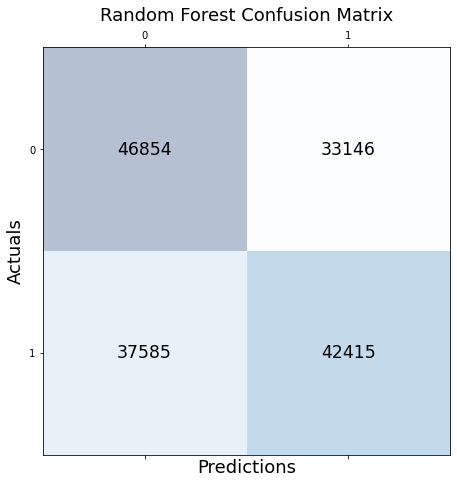

In \[ \]:

     

In \[ \]:

     

In \[ \]:

     

In \[ \]:

     

In \[ \]:

     

In \[45\]:

    from sklearn.neighbors import KNeighborsClassifier

    knn = KNeighborsClassifier(n_neighbors=8)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print("\n                   ***********************************")
    print("\n                         KNN Classification Report")
    print("\n                   ***********************************\n\n")
    print(classification_report(y_test,y_pred))


    print("\n\n\n *************************")
    print("\n     KNN Confusion Matrix")
    print("\n *****************************\n\n")

    conf_matrix = confusion_matrix(y_test.ravel(),y_pred.ravel())
    print(conf_matrix)


    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
     
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('KNN Confusion Matrix', fontsize=18)
    plt.show()

                       ***********************************

                             KNN Classification Report

                       ***********************************


                  precision    recall  f1-score   support

               0       0.52      0.36      0.43     40094
               1       0.51      0.40      0.45     39906

       micro avg       0.51      0.38      0.44     80000
       macro avg       0.51      0.38      0.44     80000
    weighted avg       0.51      0.38      0.44     80000
     samples avg       0.38      0.38      0.38     80000




     *************************

         KNN Confusion Matrix

     *****************************


    [[51216 28784]
     [49605 30395]]

    /usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
      _warn_prf(average, modifier, msg_start, len(result))

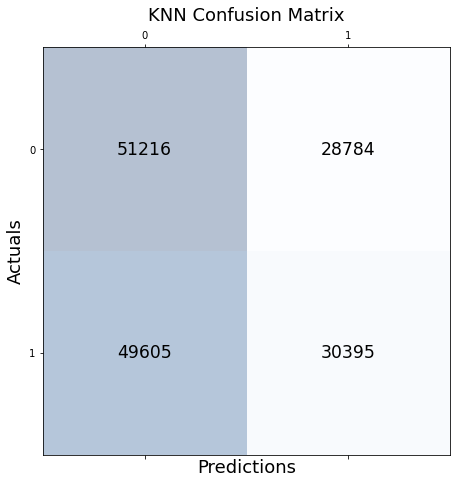

In \[45\]:

     

In \[ \]:

     

In \[ \]:

     

In \[46\]:

    import pickle

    with open('random_forest', 'wb') as file:
        pickle.dump(random_forest, file)

    with open('knn', 'wb') as file:
        pickle.dump(knn, file)

In \[ \]:

     

In \[ \]:

     

In \[ \]:

     

In \[54\]:

    # ['Negative Score','Positive Score']

    test=["Good Product Best item"]
    print(test)
    print('RESULT:')
    print('LSTM Prediction',model.predict(pad_sequences(tokenizer.texts_to_sequences(test),maxlen=maxlen)))
    print('KNN Prediction',random_forest.predict(pad_sequences(tokenizer.texts_to_sequences(test),maxlen=maxlen)))
    print('Random Forest Prediction',knn.predict(pad_sequences(tokenizer.texts_to_sequences(test),maxlen=maxlen)))

    ['Good Product Best item']
    RESULT:
    LSTM Prediction [[0.00791194 0.9920603 ]]
    KNN Prediction [[1 0]]
    Random Forest Prediction [[0 1]]

In \[ \]: